In [12]:
# 1. Data Generation:

import pandas as pd
import numpy as np

# Setting random seed for reproducibility
np.random.seed(42)

# Creating a synthetic dataset
num_customers = 1000
customer_ids = range(1, num_customers + 1)
age = np.random.randint(18, 70, num_customers)
gender = np.random.choice(['Male', 'Female'], num_customers)
income = np.random.randint(20000, 100000, num_customers)
strategies = np.random.choice(['Discount', 'Buy-One-Get-One-Free', 'Loyalty Program'], num_customers)
purchases = np.random.randint(1, 20, num_customers)
purchase_amount = purchases * np.random.uniform(10, 500, num_customers)
date_of_purchase = pd.date_range(start='2023-01-01', periods=num_customers, freq='D')

# Creating DataFrame
data = pd.DataFrame({
    'CustomerID': customer_ids,
    'Age': age,
    'Gender': gender,
    'AnnualIncome': income,
    'MarketingStrategy': strategies,
    'NumberOfPurchases': purchases,
    'PurchaseAmount': purchase_amount,
    'DateOfPurchase': date_of_purchase
})

data.head()

,CustomerID,Age,Gender,AnnualIncome,MarketingStrategy,NumberOfPurchases,PurchaseAmount,DateOfPurchase
0,1,56,Male,65648,Buy-One-Get-One-Free,10,1230.893804,2023-01-01
1,2,69,Male,29516,Loyalty Program,15,6880.190907,2023-01-02
2,3,46,Male,22396,Loyalty Program,11,3431.935113,2023-01-03
3,4,32,Female,39129,Discount,13,1698.841940,2023-01-04
4,5,60,Male,21591,Buy-One-Get-One-Free,5,1742.165439,2023-01-05


In [14]:
# 2. Data Cleaning:

# Checking for missing values
data.isnull().sum()

# Checking for duplicates
data.duplicated().sum()

# Checking data types
data.dtypes

# Summary statistics
data.describe()

,CustomerID,Age,AnnualIncome,NumberOfPurchases,PurchaseAmount,DateOfPurchase
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000
mean,500.500000,43.81900,60499.842000,10.109000,2513.511599,2024-05-14 12:00:00
min,1.000000,18.00000,20163.000000,1.000000,14.746573,2023-01-01 00:00:00
25%,250.750000,31.00000,42613.500000,5.000000,794.054486,2023-09-07 18:00:00
50%,500.500000,44.00000,59294.500000,10.000000,1882.526430,2024-05-14 12:00:00
75%,750.250000,56.00000,80545.000000,15.000000,3830.721927,2025-01-19 06:00:00
max,1000.000000,69.00000,99973.000000,19.000000,9477.868475,2025-09-26 00:00:00
std,288.819436,14.99103,22721.964558,5.473854,2130.170639,NaN


In [16]:
# 3. Data Analysis:
# a. Z-Test (Comparing means of two populations):

from statsmodels.stats.weightstats import ztest

# Z-test to compare the average purchase amount between 'Discount' and 'Buy-One-Get-One-Free' strategies
discount_data = data[data['MarketingStrategy'] == 'Discount']['PurchaseAmount']
bogo_data = data[data['MarketingStrategy'] == 'Buy-One-Get-One-Free']['PurchaseAmount']

z_stat, p_value = ztest(discount_data, bogo_data)

print(f"Z-statistic: {z_stat}, P-value: {p_value}")

#Interpratation
alpha = 0.05
if p_value < alpha:
    print("There is a significant difference in average purchase amount between 'Discount' and 'Buy-One-Get-One-Free' strategies.")

else:
    print("There is no significant difference in average purchase amount between 'Discount' and 'Buy-One-Get-One-Free' strategies.")

Z-statistic: 1.414907923783173, P-value: 0.15709549444390838
There is no significant difference in average purchase amount between 'Discount' and 'Buy-One-Get-One-Free' strategies.


In [17]:
# b. T-Test (Comparing two strategies):

from scipy.stats import ttest_ind

# T-test to compare the effectiveness of 'Discount' vs 'Loyalty Program'
discount_data = data[data['MarketingStrategy'] == 'Discount']['PurchaseAmount']
loyalty_data = data[data['MarketingStrategy'] == 'Loyalty Program']['PurchaseAmount']

t_stat, p_value = ttest_ind(discount_data, loyalty_data)

print(f"T-statistic: {t_stat}, P-value: {p_value}")

# Interpretation
alpha = 0.05
if p_value < alpha:
    print("There is a significant difference in effectiveness between 'Discount' and 'Loyalty Program'.")
else:
    print("There is no significant difference in effectiveness between 'Discount' and 'Loyalty Program'.")

T-statistic: 0.02908033859201957, P-value: 0.9768090491527511
There is no significant difference in effectiveness between 'Discount' and 'Loyalty Program'.


In [18]:
# c. Chi-Square Test (Marketing Strategy vs Gender):

from scipy.stats import chi2_contingency

# Cross-tabulation
contingency_table = pd.crosstab(data['Gender'], data['MarketingStrategy'])

# Chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-square Statistic: {chi2}, P-value: {p}")

# Interpretation
alpha = 0.05
if p < alpha:
    print("There is a significant association between gender and marketing strategy.")
else:
    print("There is no significant association between gender and marketing strategy.")

Chi-square Statistic: 2.2066710596925, P-value: 0.33176263192812877
There is no significant association between gender and marketing strategy.


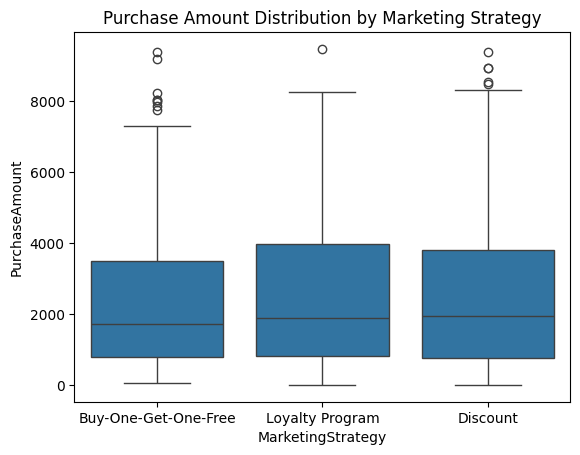

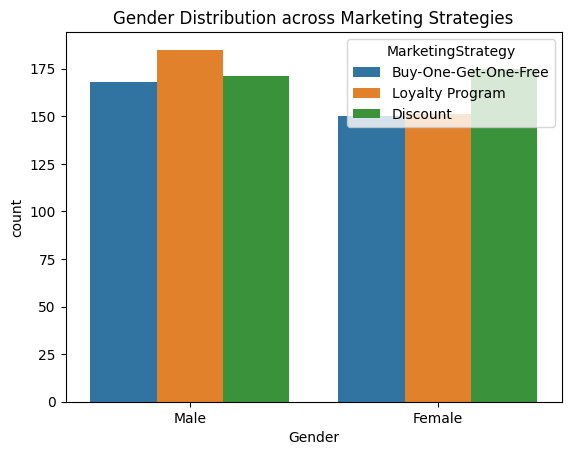

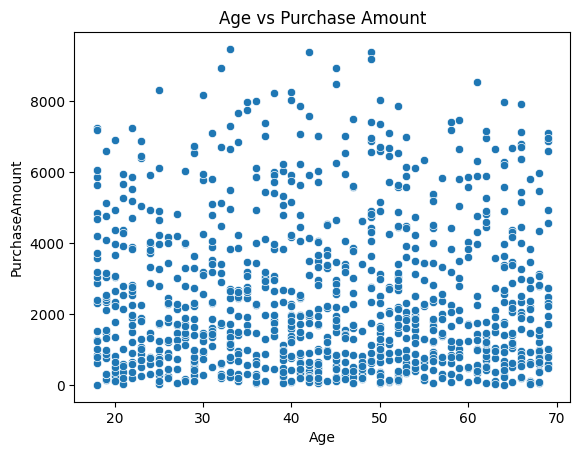

In [19]:
# 4. Data Visualization:

import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of purchase amounts by marketing strategy
sns.boxplot(x='MarketingStrategy', y='PurchaseAmount', data=data)
plt.title('Purchase Amount Distribution by Marketing Strategy')
plt.show()

# Bar plot for Gender vs Marketing Strategy
sns.countplot(x='Gender', hue='MarketingStrategy', data=data)
plt.title('Gender Distribution across Marketing Strategies')
plt.show()

# Scatter plot for Age vs Purchase Amount
sns.scatterplot(x='Age', y='PurchaseAmount', data=data)
plt.title('Age vs Purchase Amount')
plt.show()